## Name: Sanchit Kripalani <br> Batch: M1 <br> Roll No: 31145

### Problem Statement

Create an "Academic performance" dataset of students and perform the following operations using Python.

1. Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them.

2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them.

3. Apply data transformations on at least one of the variables. The purpose of this transformation should be one of the following reasons: to change the scale for better understanding of the variable, to convert a non-linear relation into a linear one, or to decrease the skewness and convert the distribution into a normal distribution.

In [1]:
# Import Necessary libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Read the dataset
raw_data = pd.read_csv('Marks_Insem.csv')

raw_data.head()

,Sr. No,SEAT NO,DSA,EM3,MP,PPL,SE
0,1,S190054201,28.0,24.0,26.0,21.0,23.0
1,2,S190054202,30.0,28.0,29.0,26.0,26.0
2,3,S190054203,29.0,21.0,22.0,28.0,27.0
3,4,S190054204,30.0,29.0,28.0,30.0,23.0
4,5,S190054205,30.0,28.0,23.0,23.0,26.0


### Data Preprocessing

In [3]:
# Using .info() to get detailed information about raw_data
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Sr. No   332 non-null    int64  
 1   SEAT NO  332 non-null    object 
 2   DSA      325 non-null    float64
 3   EM3      326 non-null    float64
 4   MP       328 non-null    float64
 5   PPL      327 non-null    float64
 6   SE       326 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 18.3+ KB


In [4]:
# Checking the number of null values
raw_data.isna().sum()

Sr. No     0
SEAT NO    0
DSA        7
EM3        6
MP         4
PPL        5
SE         6
dtype: int64

It is observed that there are missing values in the dataset for all the subjects. We will replace these null values with the mean values of the subjects.

In [5]:
# Replace null values with the mean of the data
dsa_mean = raw_data['DSA'].mean()
em3_mean = raw_data['EM3'].mean()
mp_mean = raw_data['MP'].mean()
ppl_mean = raw_data['PPL'].mean()
se_mean = raw_data['SE'].mean()

print("Mean marks in DSA is: ", dsa_mean)
print("Mean marks in EM3 is: ", em3_mean)
print("Mean marks in MP is: ", mp_mean)
print("Mean marks in PPL is: ", ppl_mean)
print("Mean marks in SE is: ", se_mean)


raw_data['DSA'].fillna(dsa_mean, inplace=True)
raw_data['EM3'].fillna(em3_mean, inplace=True)
raw_data['MP'].fillna(mp_mean, inplace=True)
raw_data['PPL'].fillna(ppl_mean, inplace=True)
raw_data['SE'].fillna(se_mean, inplace=True)

Mean marks in DSA is:  28.396923076923077
Mean marks in EM3 is:  24.595092024539877
Mean marks in MP is:  25.103658536585368
Mean marks in PPL is:  25.152905198776757
Mean marks in SE is:  27.300613496932517


In [6]:
# Check the number of null values again
raw_data.isna().sum()

Sr. No     0
SEAT NO    0
DSA        0
EM3        0
MP         0
PPL        0
SE         0
dtype: int64

In [7]:
# Use .describe() method will be used to get the description of the data
raw_data.describe()

,Sr. No,DSA,EM3,MP,PPL,SE
count,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000
mean,166.500000,28.396923,24.595092,25.103659,25.152905,27.300613
std,95.984374,2.663277,4.147052,3.906952,3.163402,3.842260
min,1.000000,13.000000,8.000000,14.000000,20.000000,15.000000
25%,83.750000,28.000000,23.000000,22.000000,22.000000,26.000000
50%,166.500000,29.500000,26.000000,25.103659,25.000000,29.000000
75%,249.250000,30.000000,28.000000,29.000000,28.000000,30.000000
max,332.000000,30.000000,30.000000,30.000000,30.000000,30.000000


**Observations**

- All the null values have been removed from the dataset.


- The minimum value of EM3 is 8 while that in ppl is 20. These values may/may not be removed from the data depending on whether they are within the upper and lower bounds.


### Plotting Graphs to Find Outliers

In [8]:
# Function to plot a histogram
def plotHisto(dataframe, column):
    
    # Define the plot size
    plt.figure(figsize=(10, 5))
    
    # Plotting the histogram
    plt.subplot(1,2,1)
    plt.hist(dataframe[column])
    plt.title("Distribution of Marks in {}".format(column))
    
    # Plotting the boxplot
    plt.subplot(1,2,2)
    plt.boxplot(dataframe[column])
    plt.title("Box Plot of Marks in {}".format(column))
    
    plt.tight_layout()

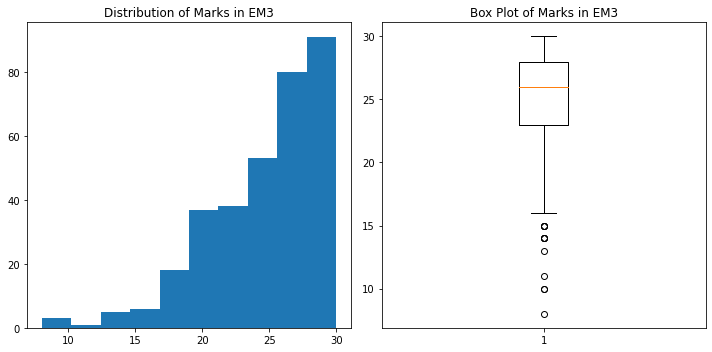

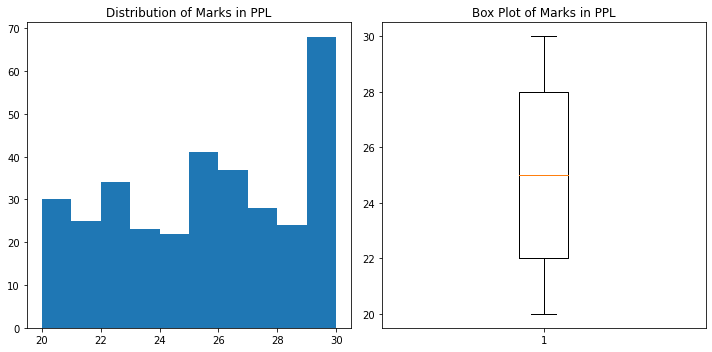

In [9]:
# Plot the histogram for EM3 and PPL

plotHisto(raw_data, 'EM3'), plotHisto(raw_data, 'PPL')

plt.show()

### Finding Outliers

We will demonstrate how outliers are discarded using marks of 2 subjects, i.e EM3 and PPL

In [10]:
# We will be finding outliers in EM3 subject
Q1 = raw_data['EM3'].quantile(0.25)
Q3 = raw_data['EM3'].quantile(0.75)

Q1, Q3

(23.0, 28.0)

In [11]:
# Finding Inter Quartile Range
IQR = Q3 - Q1

IQR

5.0

In [12]:
# Finding upper and lower bounds of Inter Quartile Range
lower_bound = Q1 - IQR*1.5
upper_bound = Q3 + IQR*1.5

lower_bound, upper_bound

(15.5, 35.5)

These upper and lower bounds will be used to discard outliers. All the value within the lower and upper bounds will be preserved and the rest will be removed.

In [13]:
# Display the Outlier values using upper and lower bounds
data_outliers = raw_data[(raw_data['EM3'] > upper_bound) | (raw_data['EM3'] < lower_bound)]

data_outliers.describe()

,Sr. No,DSA,EM3,MP,PPL,SE
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,187.384615,22.923077,12.923077,23.692308,24.384615,26.461538
std,92.031280,5.438467,2.361551,4.888500,3.905946,3.306947
min,69.000000,13.000000,8.000000,14.000000,20.000000,21.000000
25%,127.000000,20.000000,11.000000,22.000000,21.000000,24.000000
50%,154.000000,24.000000,14.000000,23.000000,25.000000,27.000000
75%,297.000000,27.000000,15.000000,27.000000,27.000000,30.000000
max,320.000000,30.000000,15.000000,30.000000,30.000000,30.000000


In [14]:
# Display the data with no outliers 
data_no_outliers = raw_data[(raw_data['EM3'] > lower_bound) & (raw_data['EM3'] < upper_bound)]

data_no_outliers.describe()

,Sr. No,DSA,EM3,MP,PPL,SE
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,165.648903,28.619995,25.070754,25.161174,25.184215,27.334808
std,96.184517,2.234296,3.448811,3.860278,3.132951,3.863140
min,1.000000,16.000000,16.000000,14.000000,20.000000,15.000000
25%,82.500000,28.000000,23.000000,22.000000,22.000000,26.000000
50%,167.000000,30.000000,26.000000,25.103659,25.000000,30.000000
75%,248.500000,30.000000,28.000000,29.000000,28.000000,30.000000
max,332.000000,30.000000,30.000000,30.000000,30.000000,30.000000


In [15]:
# Similarly, we will be finding outliers in PPL subject
Q1 = data_no_outliers['PPL'].quantile(0.25)
Q3 = data_no_outliers['PPL'].quantile(0.75)

Q1, Q3

(22.0, 28.0)

In [16]:
# Finding Inter Quartile Range
IQR = Q3 - Q1

IQR

6.0

In [17]:
# Finding upper and lower bounds of Inter Quartile Range
lower_bound = Q1 - IQR*1.5
upper_bound = Q3 + IQR*1.5

lower_bound, upper_bound

(13.0, 37.0)

In [18]:
# Display the data with no outliers 
data_no_outliers = data_no_outliers[(data_no_outliers['PPL'] > lower_bound) & (data_no_outliers['PPL'] < upper_bound)]

data_no_outliers.describe()

,Sr. No,DSA,EM3,MP,PPL,SE
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,165.648903,28.619995,25.070754,25.161174,25.184215,27.334808
std,96.184517,2.234296,3.448811,3.860278,3.132951,3.863140
min,1.000000,16.000000,16.000000,14.000000,20.000000,15.000000
25%,82.500000,28.000000,23.000000,22.000000,22.000000,26.000000
50%,167.000000,30.000000,26.000000,25.103659,25.000000,30.000000
75%,248.500000,30.000000,28.000000,29.000000,28.000000,30.000000
max,332.000000,30.000000,30.000000,30.000000,30.000000,30.000000


### Normalization

In [19]:
# We will use min max scaler to normalize the data
from sklearn.preprocessing import MinMaxScaler

columns = ['EM3', 'PPL']

scaler = MinMaxScaler()
data_no_outliers[['EM3', 'PPL']] = pd.DataFrame(scaler.fit_transform(data_no_outliers[columns]), columns=columns)

In [20]:
data_no_outliers

,Sr. No,SEAT NO,DSA,EM3,MP,PPL,SE
0,1,S190054201,28.0,0.571429,26.0,0.1,23.0
1,2,S190054202,30.0,0.857143,29.0,0.6,26.0
2,3,S190054203,29.0,0.357143,22.0,0.8,27.0
3,4,S190054204,30.0,0.928571,28.0,1.0,23.0
4,5,S190054205,30.0,0.857143,23.0,0.3,26.0
...,...,...,...,...,...,...,...
327,328,S190054528,30.0,NaN,30.0,NaN,29.0
328,329,S190054529,29.0,NaN,30.0,NaN,22.0
329,330,S190054530,29.0,NaN,30.0,NaN,22.0
330,331,S190054531,29.0,NaN,30.0,NaN,20.0
